In [58]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

import random as rand
%matplotlib inline
import matplotlib.pyplot as plt 


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])


trainset = dsets.SVHN('data', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = dsets.SVHN('data', download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Using downloaded and verified file: data/train_32x32.mat
Using downloaded and verified file: data/train_32x32.mat


In [51]:
image, label = next(iter(trainloader))


In [65]:
image.shape
(image.view(image.shape[0],-1)).shape
helper.imshow(image[0,:]);

AttributeError: module 'helper' has no attribute 'imshow'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


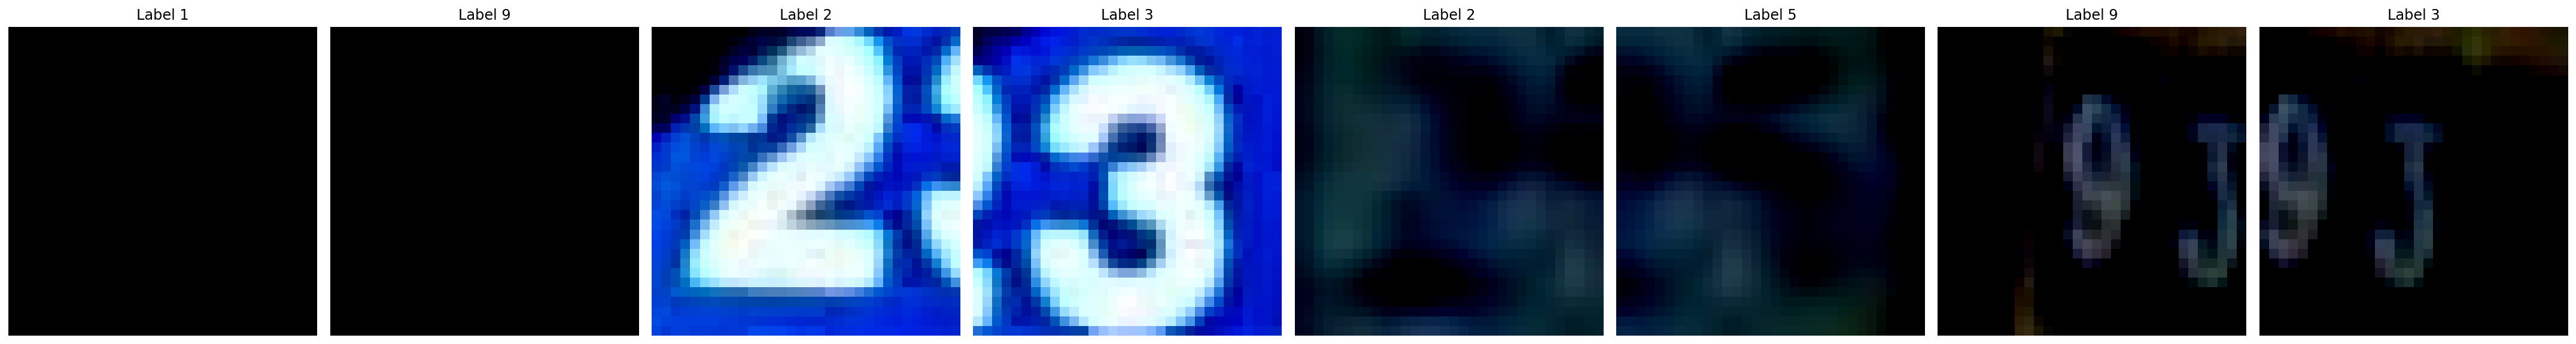

In [61]:
fig, ax = plt.subplots(1, 8)
fig.set_size_inches(30, 4)
for i in range(8):
    img, lbl = trainset[i]
    img_disp = img.permute(1,2,0)
    ax[i].imshow(img_disp)
    ax[i].axis("off")
    ax[i].set_title(f"Label {lbl}")

plt.tight_layout()
plt.show()

In [73]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
# model = nn.Sequential(nn.Linear(3072,128),
#                       nn.ReLU(),
#                       nn.Linear(128,64),
#                       nn.ReLU(),
#                       nn.Linear(64,10),
#                       nn.LogSoftmax(dim=1))


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


In [74]:


# criterion = nn.NLLLoss()

# optimizer = optim.SGD(model.parameters(),lr = 0.003)
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [76]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])
equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

tensor([[5],
        [3],
        [3],
        [3],
        [0],
        [3],
        [0],
        [0],
        [3],
        [3]])
Accuracy: 3.125%


In [72]:
# epochs = 15
# for i in range(epochs):
#     running_loss = 0
#     for images, labels in trainloader:
#         images = images.view(images.shape[0],-1)
#         optimizer.zero_grad()
#         op = model(images)
#         loss = criterion(op,labels)
#         loss.backward()
#         optimizer.step()
        
                
#         running_loss += loss.item()
#     else:
#         print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.2706086977079964
Training loss: 2.2271023335935767
Training loss: 2.192643024411264
Training loss: 2.125155038708683
Training loss: 2.017516015606676
Training loss: 1.8750359348855163
Training loss: 1.7038428585602206
Training loss: 1.5434428389936556
Training loss: 1.415811874772784
Training loss: 1.3151473351441096
Training loss: 1.235050956078492
Training loss: 1.1708492749643118
Training loss: 1.118022396679008
Training loss: 1.073037688544744
Training loss: 1.0324709284253517


In [77]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        ## TODO: Implement the validation pass and print out the validation accuracy
        with torch.no_grad():
            for images, labels in testloader:
                logps = model(images)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1,dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy = torch.mean(equals.type(torch.FloatTensor))
                print(f'in process accuracy: {accuracy.item()*100}%')
                
                
        print(f'Accuracy: {accuracy.item()*100}%')

in process accuracy: 64.0625%
in process accuracy: 68.75%
in process accuracy: 70.3125%
in process accuracy: 70.3125%
in process accuracy: 78.125%
in process accuracy: 64.0625%
in process accuracy: 67.1875%
in process accuracy: 75.0%
in process accuracy: 67.1875%
in process accuracy: 68.75%
in process accuracy: 70.3125%
in process accuracy: 68.75%
in process accuracy: 76.5625%
in process accuracy: 56.25%
in process accuracy: 75.0%
in process accuracy: 68.75%
in process accuracy: 70.3125%
in process accuracy: 75.0%
in process accuracy: 75.0%
in process accuracy: 71.875%
in process accuracy: 65.625%
in process accuracy: 64.0625%
in process accuracy: 60.9375%
in process accuracy: 76.5625%
in process accuracy: 70.3125%
in process accuracy: 81.25%
in process accuracy: 70.3125%
in process accuracy: 85.9375%
in process accuracy: 70.3125%
in process accuracy: 71.875%
in process accuracy: 70.3125%
in process accuracy: 71.875%
in process accuracy: 60.9375%
in process accuracy: 70.3125%
in proces

In [96]:
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 32, 32).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "SVNH":
        ax2.set_yticklabels(np.arange(10))

    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

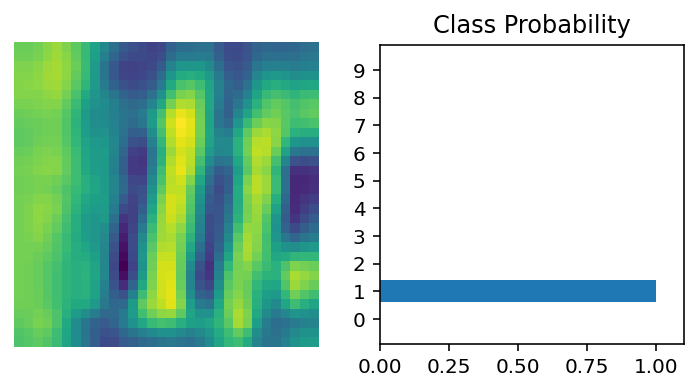

In [110]:
# Import helper module (should be in the repo)


# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 3072)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
view_classify(img.view(3, 32, 32), ps, version='SVNH')
